<a href="https://colab.research.google.com/github/vinigm/Estudos/blob/main/Matematica_e_Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vetorização de Problemas**
---



**Abordagens Estatísticas**
- Descritiva: foco no passado para entender o presente
- Preditiva: foca no passado para inferir no futuro

**VETORIZAÇÃO:** Processo de transformar um código escalar em sua forma vetorial. A vantagem de utilizarmos vetorização é que ela é mais rápida e utiliza menos memória

Exemplo 1: Comparar o retorno de cada cliente obtido através do investimento com o valor corrigido pela inflação. Quantos clientes "perderam" para a inflação?

In [91]:
montante = 1000
montante_final = 1001.5 # 0.15% de retorno

In [92]:
ipca = 0.25/100
montante_inflacao = montante * (1+ipca)

print(montante_inflacao)

1002.5


In [93]:
print(montante_final < montante_inflacao)

True


Para 100 mil clientes

In [94]:
from random import random, randint
montante_lista = [randint(0,5000) for _ in range(0,100000)]
montante_final_lista = [round(montante * (1+ (0.3 * random() / 100)), 2) for montante in montante_lista]                       

In [95]:
print(montante_lista[0:5])
print(montante_final_lista[0:5])

[1293, 117, 113, 3013, 2529]
[1293.14, 117.27, 113.23, 3021.23, 2533.22]


In [96]:
from time import time

perdeu = list()

inicio = time()
for montante, montante_final in zip(montante_lista, montante_final_lista):
  perdeu.append(montante_final - montante * (1 + ipca))
fim = time()

perdeu = list(filter(lambda val: True if val < 0 else False, perdeu))
print(f'{len(perdeu)} cliente perderam para a inflação')

tempo_lista = fim - inicio
print(tempo_lista)

82944 cliente perderam para a inflação
0.03893399238586426


**PACOTE NUMPY**

Vamos vetorizar nosso calculo através da criação de vetores NumPy

In [97]:
import numpy as np

montante_array = np.array(montante_lista)
montante_final_array = np.array(montante_final_lista)

In [98]:
print(montante_array)
print(montante_final_array)

[1293  117  113 ...  478 2242 2831]
[1293.14  117.27  113.23 ...  478.19 2246.69 2833.  ]


In [99]:
from time import time

inicio = time()
perdeu = montante_final_array - montante_array * (1 + ipca)
fim = time()

perdeu = list(filter(lambda val: True if val < 0 else False, perdeu))
print(f"{len(perdeu)} cliente eprderam para a inflação")

tempo_array = fim - inicio
print(f"Duração: {tempo_array}")


82944 cliente eprderam para a inflação
Duração: 0.004309892654418945


Comparando os tempos de execução das operações escalares e vetoriais

In [100]:
tempo_lista / tempo_array # Vemos assim que fazendo através de vetorização aumentamos o tempo de processamento 13x

9.033633899430216

# **Introdução ao NumPy**

---



**Arrays vs Listas**

Ambos servem para armazenar dados sequencialmente na memória, contudo é importante maximizar suas diferenças:

- Manipulação algébrica: Arrays apresentam uma sintaxe mais simples e eficiente
- Listas sempre trabalham de forma escalar

Exemplo escalar:

In [101]:
l1 = [1, 2, 3]
l2 = [4, 5, 6]

l3 = [a + b for a, b in zip(l1, l2)]
print(l3)

[5, 7, 9]


Exemplo vetorial:

In [102]:
import numpy as np

a1 = np.array(l1)
a2 = np.array(l2)

a3 = a1 + a2
print(a3)

[5 7 9]


- Tipo: arrays trabalham melhor com elementos do mesmo tipo
- Mutabilidade: arrays são menos eficientes quanto a inserção e remoção de elementos

**Arrays 1D: Vetores**

Arrays NumPy de uma dimensão são conhecidos como **vetores**, como listas, de uma linha e uma ou mais colunas.

Criação:

In [103]:
a1 = np.array([2, 4, 6, 8])
print(a1)

[2 4 6 8]


In [104]:
a1 = np.arange(0, 10, 2)
print(a1)

[0 2 4 6 8]


In [105]:
a1 = np.zeros(10)
print(a1)

a1 = 10 * np.ones(10)
print(a1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


Manipulação:

In [106]:
a1 = np.array([2,4,6,8])
print(a1)

[2 4 6 8]


In [107]:
a1[0]

2

In [108]:
a1[0:2]

array([2, 4])

In [109]:
a1[a1>4]

array([6, 8])

Atributos:

In [110]:
a1.ndim

1

In [111]:
a1.shape

(4,)

In [112]:
a1.size

4

In [113]:
a1.dtype

dtype('int64')

Metodos:

In [114]:
a1.sort() # "inplace"
print(a1)

[2 4 6 8]


In [115]:
a1.tolist()

[2, 4, 6, 8]

**Arrays 2D: Matrizes**

Arrays NumPy de duas dimensões são conhecidos como **matrizes**, como tabelas, com linhas e colunas.

Criação:

In [116]:
m1 = np.array([[1,2,3], [4,5,6]]) # vetores como linhas
print(m1)

[[1 2 3]
 [4 5 6]]


ManipulaçãO:

In [117]:
m1[1,2]

6

In [118]:
m1[1,:]

array([4, 5, 6])

In [119]:
m1[:,1]

array([2, 5])

Atributos:

In [120]:
m1.ndim

2

In [121]:
m1.shape

(2, 3)

In [122]:
m1.dtype

dtype('int64')

In [123]:
m1.sort()
print(m1)

[[1 2 3]
 [4 5 6]]


In [124]:
m1.tolist()

[[1, 2, 3], [4, 5, 6]]

# **Operações com NumPy**

In [125]:
import numpy as np

a1 = np.array([1,2,3])
a2 = np.array([3,4,5])

In [126]:
np.pi

3.141592653589793

In [127]:
np.e

2.718281828459045

In [128]:
np.nan, np.NaN, np.NAN

(nan, nan, nan)

In [129]:
type(np.inf)

float

In [130]:
np.inf, np.Inf, np.Infinity

(inf, inf, inf)

**Funções elementares**

Soma

In [131]:
a3 = a1+a2
print(a3)

a3 = a1/a2
print(a3)

[4 6 8]
[0.33333333 0.5        0.6       ]


Exponenciação

In [132]:
a3 = a1 ** 2
print(a3)

a3 = np.exp(a1)
print(a3)

a3 = np.sqrt(a1)
print(a3)

[1 4 9]
[ 2.71828183  7.3890561  20.08553692]
[1.         1.41421356 1.73205081]


Logaritmo

In [133]:
a3 = np.log(a1)
print(a1)

[1 2 3]


Trigonometria

In [134]:
a3 = np.sin(a1)
print(a3)

a3 = np.tan(a1)
print(a3)

[0.84147098 0.90929743 0.14112001]
[ 1.55740772 -2.18503986 -0.14254654]


**Algebra Vetorial**

Produto escalar - soma dos produtos dos elementos dos vetores

In [135]:
a1 = np.array([1,2,3])
a2 = np.array([3,4,5])

a3 = np.dot(a1, a2)
print(a3)

26


# **Fundamentos de Estatística**
---



**Obtendo os dados**

Vamos utilizar o salário mensal em dólares americanos de jogadores da NBA em 2020.

Download dos dados

In [136]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/wage.csv" -O wage.csv 

Manipulação dos dados

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns

In [138]:
wage_df = pd.read_csv('wage.csv')
wage_df.head()

,wage
0,1750000
1,400641
2,118071
3,811033
4,181193


In [139]:
wage_array = np.array(wage_df['wage'].astype('int').to_list())
print(wage_array[0:5])

[1750000  400641  118071  811033  181193]


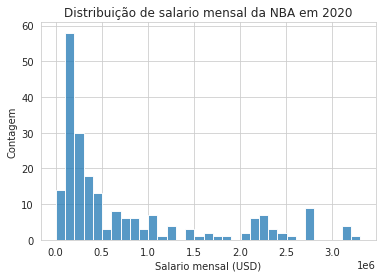

In [140]:
with sns.axes_style('whitegrid'):
  grafico = sns.histplot(data = wage_array, binwidth=100*1000)
  grafico.set(title='Distribuição de salario mensal da NBA em 2020', xlabel='Salario mensal (USD)', ylabel='Contagem')

**Média e Variância**

População e amostra
- População: subconjunto composto por TODOS os elementos de um conjunto
- Amostra: Fração dos elementos de um conjunto

In [141]:
len(wage_array)

214

Média

In [142]:
np.mean(wage_array)

762359.6074766355

Variancia - métrica de dispersão

In [143]:
np.var(wage_array)

748444533449.9955

Desvio padrão

In [144]:
np.std(wage_array)

865126.8886411955

**Ordem e Posição**

Medição Posicional - Ordenação dos elementos

Mediana - Valor do elemento central de um conjunto ordenado

In [145]:
np.median(wage_array)

339000.0

Quartil - Valor de corte de uma divisão dos elementos de um conjunto. Dividem os elementos em respectivamente 25%, 50% e 75%. Passam a idéia da distribuição dos valores dos elementos do conjunto.

In [146]:
q1 = np.quantile(wage_array, 0.25)
print(q1)

q2 = np.quantile(wage_array, 0.5)
print(q2)

q3 = np.quantile(wage_array, 0.75)
print(q3)

iqr = q3-q1
print(iqr)

165079.0
339000.0
1007752.0
842673.0


**Boxplot**

Grafico de distribuição que utiliza as métricas posicionais **medianas** e **quartis**

- **BOX** - Apresenta a maior concetração de dados. Definido como o intervalo entre o primeiro e terceiro quartil

- **WHISKERS** - Apresenta a dispersão entre os dados
- **OUTLIERS** - Pontos fora da curva 

- Média = 762.359,61
- Desvio Padrão = 865.126,89
- Mediana = 339.000,00
- 1o Quartil = 165.079,00
- 3o Quartil = 1.007.752,00

Vamos gerar um grafico boxplot com o pacote SEABORN:

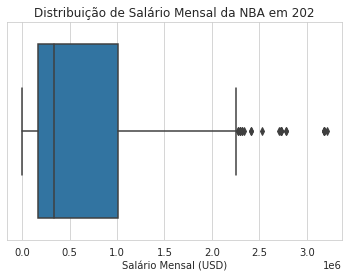

In [147]:
with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=wage_array)
  grafico.set(title='Distribuição de Salário Mensal da NBA em 202', xlabel='Salário Mensal (USD)')

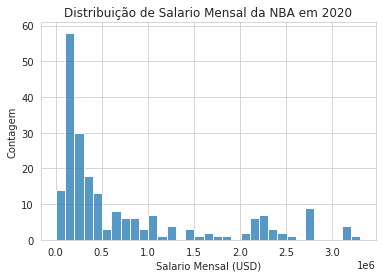

In [148]:
with sns.axes_style('whitegrid'):

  grafico = sns.histplot(data=wage_array, binwidth=100*1000)
  grafico.set(title='Distribuição de Salario Mensal da NBA em 2020', xlabel='Salario Mensal (USD)', ylabel='Contagem')

**Correlação**

Mede a dependencia estatística entre o conjunto de dados. Por exemplo, o peso e a altura de uma pessoa, pode-se traçar correlações entre as duas variaveis.

Coeficiente de correlação de perason:
- Rxy < 0 Enquanto X cresce, Y decresce
- Rxy = 0 Não há relação entre X e Y
- Rxy > 0 Enquanto X cresce, Y cresce

In [150]:
%%writefile nba.csv
height;weight;wage
2.01;86.2;17150000
1.93;106.1;898310
2.11;120.2;9881598
1.88;85.7;15643750
1.88;84.8;2875000
2.11;106.1;2376840
1.98;86.6;2625717
2.08;104.3;37199000
2.03;117.9;28942830
1.83;81.6;522738

Writing nba.csv


In [151]:
df = pd.read_csv('nba.csv', sep=';')

In [152]:
df.head()

,height,weight,wage
0,2.01,86.2,17150000
1,1.93,106.1,898310
2,2.11,120.2,9881598
3,1.88,85.7,15643750
4,1.88,84.8,2875000


In [153]:
height_array = np.array(df['height'].to_list())
weight_array = np.array(df['weight'].to_list())
wage_array = np.array(df['wage'].to_list())

In [154]:
weight_array

array([ 86.2, 106.1, 120.2,  85.7,  84.8, 106.1,  86.6, 104.3, 117.9,
        81.6])

Peso e Altura

In [157]:
np.corrcoef(weight_array, height_array)

array([[1.        , 0.73782414],
       [0.73782414, 1.        ]])

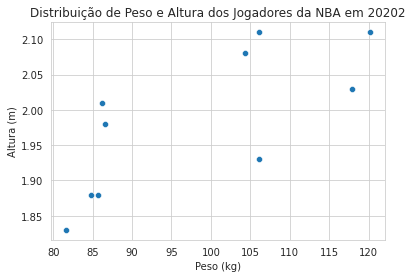

In [158]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(x=weight_array, y=height_array)
  grafico.set(title='Distribuição de Peso e Altura dos Jogadores da NBA em 20202', xlabel='Peso (kg)', ylabel='Altura (m)')

Peso e salário

In [159]:
np.corrcoef(weight_array, wage_array)

array([[1.        , 0.34965527],
       [0.34965527, 1.        ]])

Vamos fazer um grafico entre Peso x Salario - algo que não vai ter uma relação para termos um exemplo

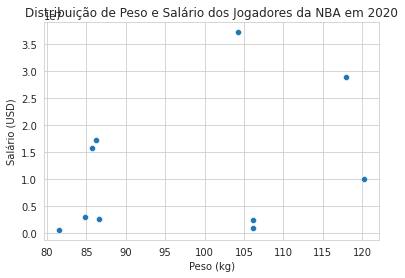

In [160]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(x=weight_array, y=wage_array)
  grafico.set(title='Distribuição de Peso e Salário dos Jogadores da NBA em 2020', xlabel='Peso (kg)', ylabel='Salário (USD)')

Altura e Salario

In [162]:
np.corrcoef(height_array, wage_array)

array([[1.        , 0.41296351],
       [0.41296351, 1.        ]])

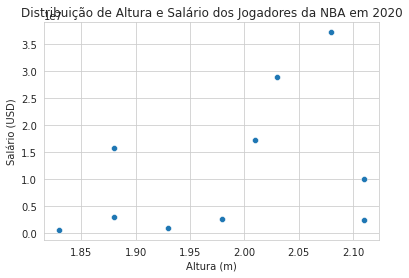

In [161]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(x=height_array, y=wage_array)
  grafico.set(title='Distribuição de Altura e Salário dos Jogadores da NBA em 2020', xlabel='Altura (m)', ylabel='Salário (USD)')

# **Exercícios - Estatistica**
---



# 1. Tráfego de São Paulo
Neste exercício, vamos continuar a analisar os dados de mobilidade urbana da cidade de
São Paulo. A base de dados está neste link e é uma copia do dado original, presente
neste link. A base de dados contem a quantidade de acidentes ocorridos na cidade entre
14/12/09 e 18/12/09, das 07:00h ás 20:00h, agregados em intervalos de 30 minutos.

In [169]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/traffic.csv"

In [170]:
import pandas as pd
df = pd.read_csv('traffic.csv', sep=';')
df.head()

,hour,bus_stoped,broken_truck,vehicle_excess,accident_victim,running_over,fire_vehicles,occurrence_freight,incident__dangerous_freight,lack_electricity,fire,flooding,manifestations,defect_trolleybuses,tree_road,semaphore_off,intermittent_emaphore,slowness_traffic_%
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"


Exemplo: (para relembrar)
- O código abaixo extrai a 13ª linha do arquivo que representa a 14ª meia hora do dia
14/12/09, contadas a partir das 07:00h, ou seja, todos os incidentes ocorridos na cidade
no dia em questão entre as 13:30h e 14:00h. Vemos, por exemplo, que dois ônibus e dois
caminhões ficaram paradados nas ruas da cidade, atrapalhando o tráfego.

In [171]:
df.iloc[[13]]

,hour,bus_stoped,broken_truck,vehicle_excess,accident_victim,running_over,fire_vehicles,occurrence_freight,incident__dangerous_freight,lack_electricity,fire,flooding,manifestations,defect_trolleybuses,tree_road,semaphore_off,intermittent_emaphore,slowness_traffic_%
13,14,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,"4,9"
